In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set a general style for the plots
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import StandardScaler

In [1]:
# Load the dataset to examine its structure and contents
file_path = "Titanic-Dataset.csv"
titanic_data = pd.read_csv(file_path)

In [2]:
# Display the first few rows to understand the data structure
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [4]:
# Check for missing values in the dataset
missing_data = titanic_data.isnull().sum()

In [5]:
missing_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Data:
Age: 177 missing values.
Cabin: 687 missing values (most of the data).
Embarked: 2 missing values.

### Survival rate by gender

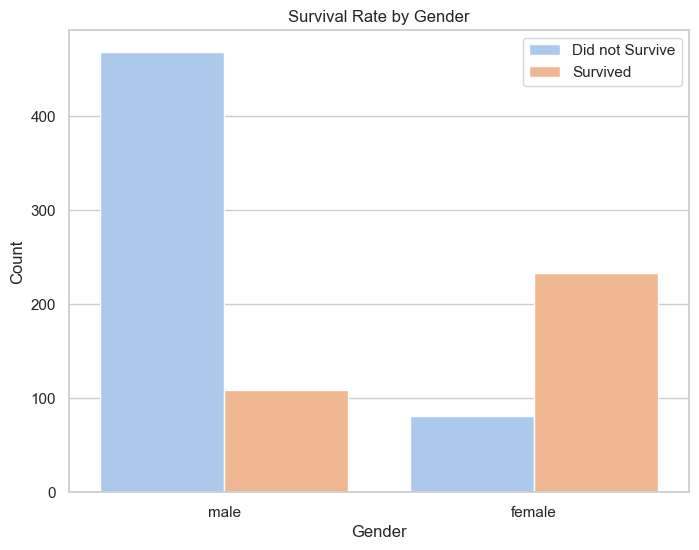

In [6]:
 plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette='pastel')
plt.title('Survival Rate by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(['Did not Survive', 'Survived'], loc='upper right')
plt.show()

In [7]:
# Survival Rate by Gender:
# Women had a higher chance of survival compared to men.
# This aligns with the principle of "women and children first."

### Survival rate by passenger class

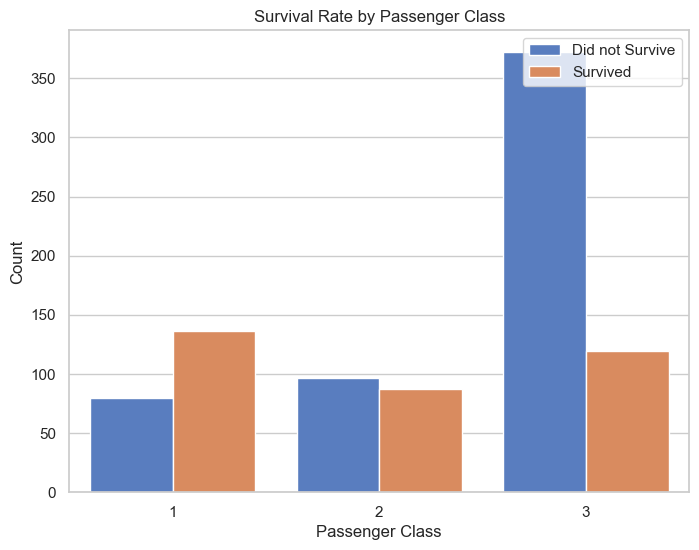

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Pclass', hue='Survived', palette='muted')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Count')
plt.xlabel('Passenger Class')
plt.legend(['Did not Survive', 'Survived'], loc='upper right')
plt.show()

In [10]:
# Survival Rate by Passenger Class:
# Passengers in 1st class had a much higher survival rate compared to those in 2nd and 3rd class.
# Wealth and access to resources likely played a role in survival.

### Age distribution by survival

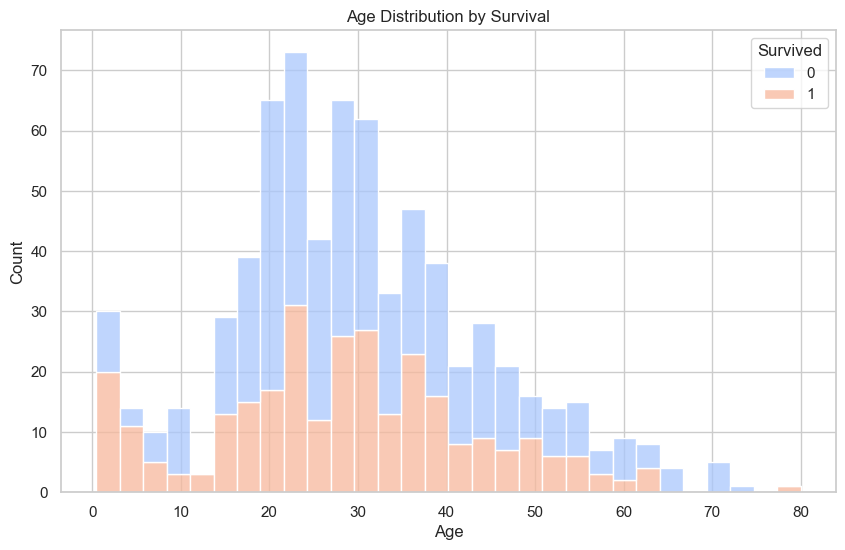

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', multiple='stack', kde=False, bins=30, palette='coolwarm')
plt.title('Age Distribution by Survival')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

In [14]:
# Age Distribution by Survival:
# There is a wide distribution of ages among survivors and non-survivors, but more younger individuals seem to have survived.
# Infants and younger children likely received preferential treatment during rescue efforts.

### Survival based on Embarked locations

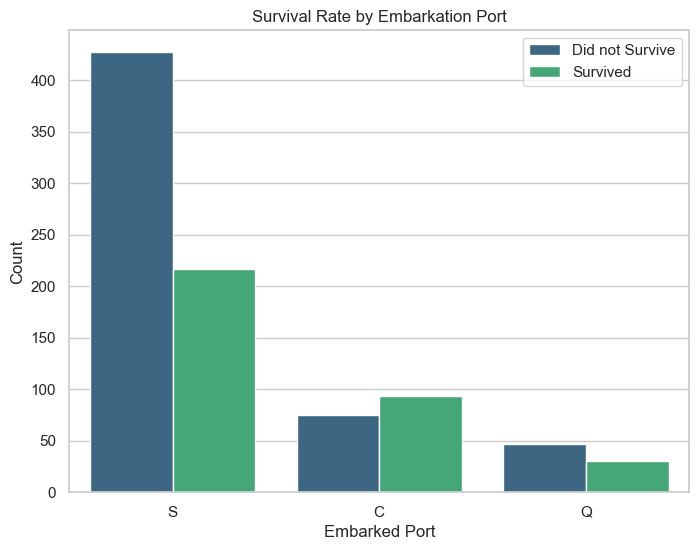

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Embarked', hue='Survived', palette='viridis')
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Count')
plt.xlabel('Embarked Port')
plt.legend(['Did not Survive', 'Survived'], loc='upper right')
plt.show()

In [ ]:
# Survival Rate by Embarkation Port:
# There are differences in survival based on the embarkation port, with passengers from Cherbourg (C) showing higher survival rates.
# This might reflect the socio-economic status of passengers boarding from different locations.

### Survival by Fare

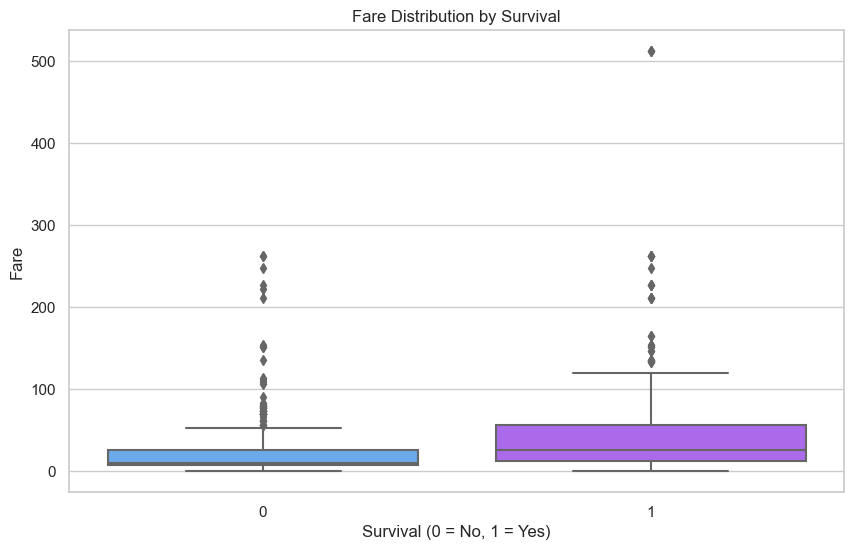

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_data, x='Survived', y='Fare', palette='cool')
plt.title('Fare Distribution by Survival')
plt.ylabel('Fare')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.show()

In [ ]:
# Fare Distribution by Survival:
# Survivors, on average, paid higher fares, suggesting that wealthier passengers had a better chance of survival

### Survival by Family Size (SibSp + Parch)

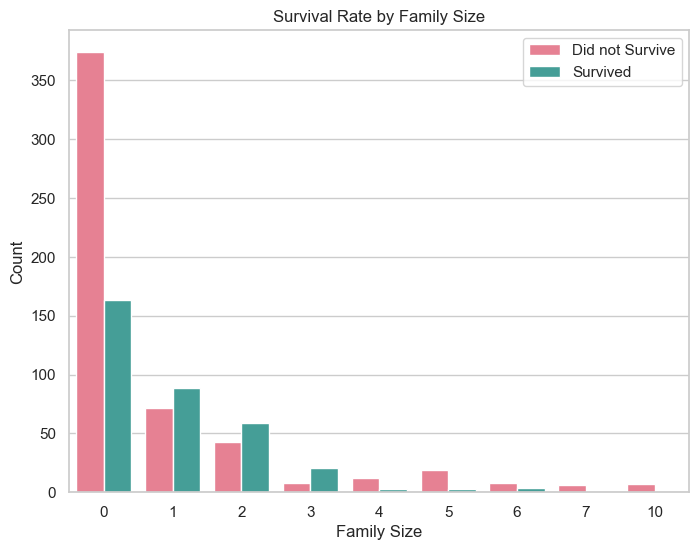

In [17]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='FamilySize', hue='Survived', palette='husl')
plt.title('Survival Rate by Family Size')
plt.ylabel('Count')
plt.xlabel('Family Size')
plt.legend(['Did not Survive', 'Survived'], loc='upper right')
plt.show()

In [18]:
# Survival by Family Size
# Passengers with a family size of 1 to 3 had a higher survival rate.
# Larger families (5 or more members) were less likely to survive.

### Correlation heatmap of numeric variables

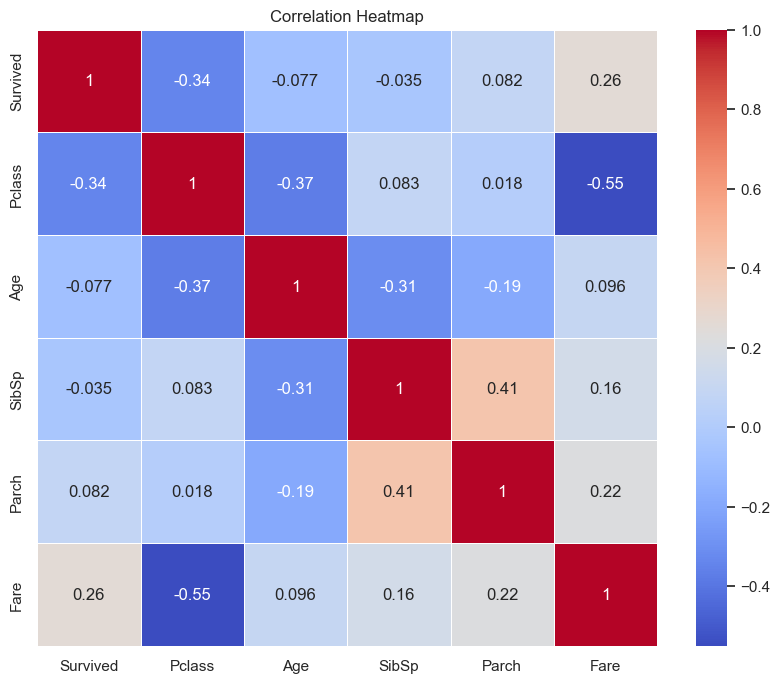

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Correlation Heatmap
# Pclass and Fare have a negative correlation (~ -0.55) because higher classes paid higher fares.
# Survival correlates positively with Fare (higher-paying passengers survived more) and negatively with Pclass (higher classes were more likely to survive).
# Family-related variables (SibSp and Parch) are moderately correlated but show weak direct correlation with Survival.

### Survival by SibSp (Siblings/Spouses aboard)

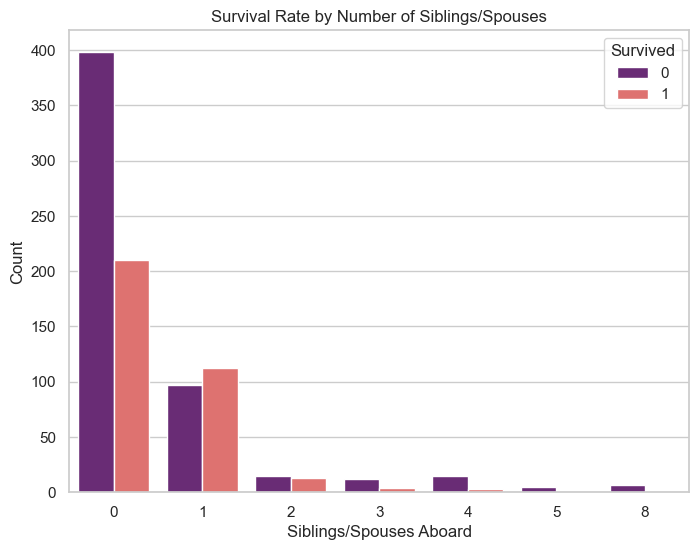

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='SibSp', hue='Survived', palette='magma')
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.ylabel('Count')
plt.xlabel('Siblings/Spouses Aboard')
plt.show()

In [22]:
# Survival by Number of Siblings/Spouses Aboard (SibSp)
# Passengers with 1 sibling or spouse had better survival rates.
# Passengers traveling alone or with 3+ siblings/spouses had lower chances of survival.

### Survival by Parch (Parents/Children aboard)

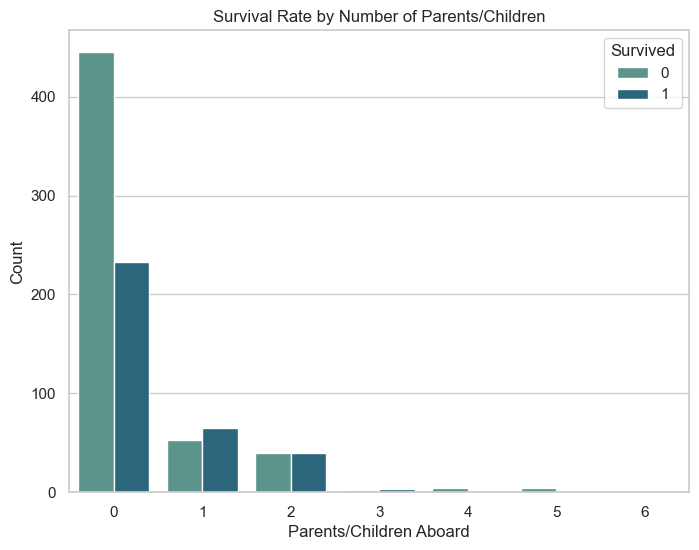

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Parch', hue='Survived', palette='crest')
plt.title('Survival Rate by Number of Parents/Children')
plt.ylabel('Count')
plt.xlabel('Parents/Children Aboard')
plt.show()

In [24]:
# Survival by Number of Parents/Children Aboard (Parch)
# Passengers with 1-2 children/parents had a higher chance of survival, likely due to families with children receiving priority in lifeboats.
# Passengers with no family on board or those with larger family groups (3+ parents/children) had lower survival rates.

# Data Pre-processing 

### Handle Missing Values

In [25]:
# Fill missing 'Age' values with the median age (better than mean for skewed data)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [26]:
# Fill missing 'Embarked' values with the most frequent port of embarkation
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [27]:
# Drop 'Cabin' column as it has too many missing values
titanic_data.drop(columns=['Cabin'], inplace=True)

### Encoding Categorical Variables

In [28]:
# Convert 'Sex' to numerical values (male: 0, female: 1)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

In [29]:
# Convert 'Embarked' to numerical values using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

### Feature Engineering

In [30]:
# Create 'FamilySize' feature by adding 'SibSp' and 'Parch'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

In [31]:
# Drop unnecessary columns: 'PassengerId', 'Name', 'Ticket' (non-informative for prediction)
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

### Normalisation

In [34]:
# Normalize 'Fare' to reduce skewness using log transformation
titanic_data['Fare'] = titanic_data['Fare'].apply(lambda x: np.log1p(x))

### Split Features and Target Variable

In [36]:
# Splitting the features and the target variable to feed to the model
X = titanic_data.drop('Survived', axis=1)  # Features
y = titanic_data['Survived']               # Target variable

### Standardization

In [37]:
# Standardize Numerical Features: 'Age', 'Fare', 'FamilySize'
scaler = StandardScaler()
X[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(X[['Age', 'Fare', 'FamilySize']])

# MODELLING

In [39]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Step 1: Split the data into Train+Validation and Test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Use Stratified K-Fold for cross-validation to ensure balanced class distributions
# 5 folds will be used for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Display the size of each split for reference
{
    "Training + Validation size": X_train_val.shape[0],
    "Test size": X_test.shape[0]
}


{'Training + Validation size': 712, 'Test size': 179}

In [40]:
# Training + Validation set: 712 samples (80%)
# Test set: 179 samples (20%)
# We have used Stratified K-Fold cross-validation to maintain the same proportion of classes
# (survivors and non-survivors) across all folds. This ensures balanced performance evaluation 
# during model validation.

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [42]:
# Define the logistic regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)


In [43]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']   # Norm used in penalization
}

In [44]:
# Apply GridSearchCV with Stratified K-Fold
grid_search = GridSearchCV(log_reg, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [45]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [46]:
print('Best parameter : ', best_params)
print('Best Model : ', best_model)

Best parameter :  {'C': 1, 'penalty': 'l2'}
Best Model :  LogisticRegression(C=1, random_state=42, solver='liblinear')


In [47]:
# Predict on the test set
y_pred = best_model.predict(X_test)

In [54]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [55]:
{
    "Best Hyperparameters": best_params,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Confusion Matrix": conf_matrix,
#     "Classification Report": class_report
}


{'Best Hyperparameters': {'C': 1, 'penalty': 'l2'},
 'Accuracy': 0.8044692737430168,
 'Precision': 0.7741935483870968,
 'Recall': 0.6956521739130435,
 'F1-Score': 0.732824427480916,
 'Confusion Matrix': array([[96, 14],
        [21, 48]])}

In [56]:
# Best Hyperparameters:
# C = 1: This indicates a regularization strength where the model balances bias and variance well.
# Penalty = l2: L2 regularization (Ridge) minimizes the sum of squared coefficients, helping prevent overfitting.
# Accuracy:
# 80.45%: The model correctly predicted survival status for around 80% of the test data, showing reasonable performance.
# Precision (77.42%):
# Out of all passengers predicted to survive, 77.42% were actual survivors.
# A good precision score indicates the model effectively reduces false positives (incorrectly predicting survival).
# Recall (69.57%):
# The model correctly identified 69.57% of the actual survivors.
# A slightly lower recall suggests that some survivors were missed (false negatives).
# F1-Score (73.28%):
# This shows the model's balanced performance, considering both false positives and false negatives.
# Confusion Matrix
# True Negatives (96): 96 passengers were correctly predicted as non-survivors.
# False Positives (14): 14 passengers were incorrectly predicted as survivors.
# False Negatives (21): 21 actual survivors were missed by the model.
# True Positives (48): 48 passengers were correctly predicted as survivors

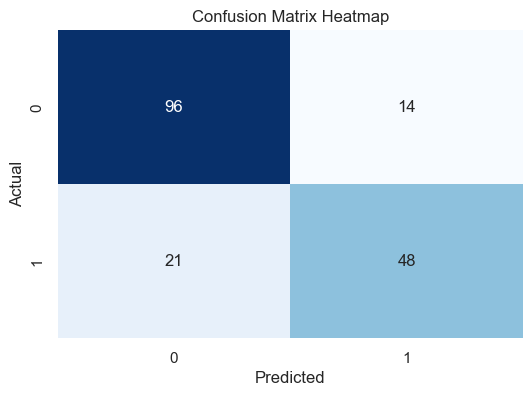

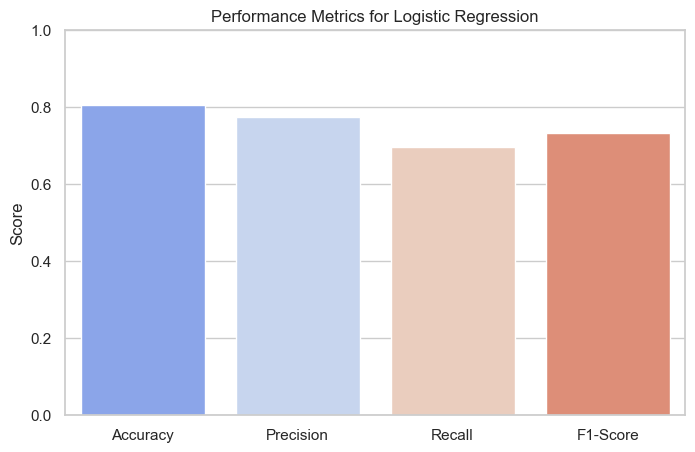

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Heatmap for Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot 2: Bar Plot for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='coolwarm')
plt.ylim(0, 1)  # Set the y-axis limit to [0,1]
plt.title('Performance Metrics for Logistic Regression')
plt.ylabel('Score')
plt.show()


## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [60]:
# Define the hyperparameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, None],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required at a leaf node
}

In [61]:
# Apply GridSearchCV with Stratified K-Fold for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=skf, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_val, y_train_val)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [62]:
# Best parameters and model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

In [63]:
print('Best parameter : ', best_params_rf)
print('Best Model : ', best_model_rf)

Best parameter :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Model :  RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=42)


In [64]:
# Predict on the test set
y_pred_rf = best_model_rf.predict(X_test)

In [65]:
# Compute evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [66]:
# Display the results
{
    "Best Hyperparameters": best_params_rf,
    "Accuracy": accuracy_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1-Score": f1_rf,
    "Confusion Matrix": conf_matrix_rf
}


{'Best Hyperparameters': {'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 50},
 'Accuracy': 0.8156424581005587,
 'Precision': 0.7903225806451613,
 'Recall': 0.7101449275362319,
 'F1-Score': 0.7480916030534351,
 'Confusion Matrix': array([[97, 13],
        [20, 49]])}

In [ ]:
# 1. Best Hyperparameters:
# Max Depth = 10: Limits the depth of the trees to prevent overfitting.
# Min Samples Leaf = 1: Allows individual samples to be leaf nodes, enabling more splits.
# Min Samples Split = 5: Requires at least 5 samples for a node to split, controlling tree growth.
# Number of Estimators = 50: Uses 50 decision trees to build the ensemble, balancing performance and computation time.
# 2. Performance Metrics:
# Accuracy: 81.56%
# The model correctly predicted survival status for 81.56% of the passengers.
# Precision: 79.03%
# Out of all passengers predicted to survive, 79.03% were actual survivors.
# A good precision indicates that false positives (incorrectly predicting survival) are minimized.
# Recall: 71.01%
# The model correctly identified 71.01% of actual survivors.
# The recall value shows that some survivors were missed (false negatives).
# F1-Score: 74.81%
# The F1-score is a balanced measure of precision and recall, indicating solid overall performance.
# 3. Confusion Matrix:
# True Negatives (97): 97 passengers correctly predicted as non-survivors.
# False Positives (13): 13 passengers incorrectly predicted as survivors.
# False Negatives (20): 20 actual survivors were missed by the model.
# True Positives (49): 49 passengers correctly predicted as survivors.

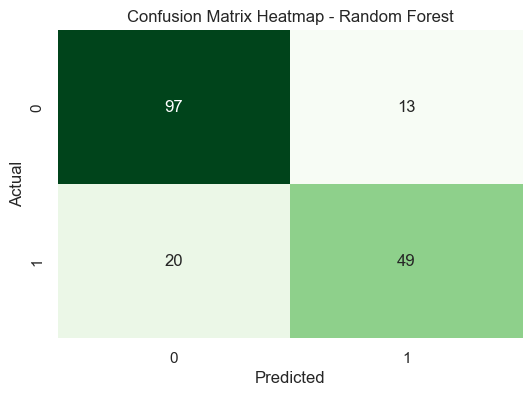

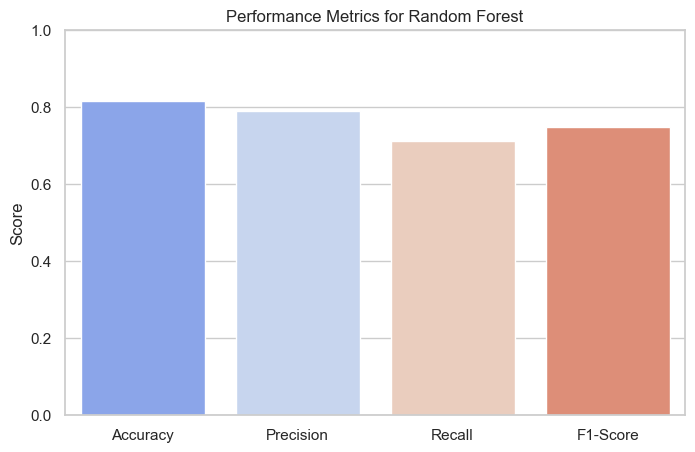

In [67]:
# Plot 1: Heatmap for Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Confusion Matrix Heatmap - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot 2: Bar Plot for Accuracy, Precision, Recall, and F1-Score
metrics_rf = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values_rf = [accuracy_rf, precision_rf, recall_rf, f1_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics_rf, y=values_rf, palette='coolwarm')
plt.ylim(0, 1)  # Set the y-axis limit to [0,1]
plt.title('Performance Metrics for Random Forest')
plt.ylabel('Score')
plt.show()

In [70]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define the columns
table.field_names = ["Metric", "Logistic Regression", "Random Forest"]

# Add rows to the table
table.add_row(["Best Hyperparameters", "C: 1, penalty: l2", 
               "max_depth: 10, min_samples_leaf: 1,\nmin_samples_split: 5, n_estimators: 50"])
table.add_row(["Accuracy", "80.45%", "81.56%"])
table.add_row(["Precision", "77.42%", "79.03%"])
table.add_row(["Recall", "69.57%", "71.01%"])
table.add_row(["F1-Score", "73.28%", "74.81%"])
table.add_row(["Confusion Matrix", "[[96, 14], [21, 48]]", "[[97, 13], [20, 49]]"])

# Display the table
print(table)


+----------------------+----------------------+----------------------------------------+
|        Metric        | Logistic Regression  |             Random Forest              |
+----------------------+----------------------+----------------------------------------+
| Best Hyperparameters |  C: 1, penalty: l2   |  max_depth: 10, min_samples_leaf: 1,   |
|                      |                      | min_samples_split: 5, n_estimators: 50 |
|       Accuracy       |        80.45%        |                 81.56%                 |
|      Precision       |        77.42%        |                 79.03%                 |
|        Recall        |        69.57%        |                 71.01%                 |
|       F1-Score       |        73.28%        |                 74.81%                 |
|   Confusion Matrix   | [[96, 14], [21, 48]] |          [[97, 13], [20, 49]]          |
+----------------------+----------------------+----------------------------------------+


In [ ]:
# Accuracy:
# Random Forest performed slightly better (81.56%) compared to Logistic Regression (80.45%).
# Precision:
# Both models show strong precision, with Random Forest slightly better (79.03% vs. 77.42%). 
# This means fewer passengers were incorrectly predicted as survivors.
# Recall:
# Random Forest also outperforms Logistic Regression in recall (71.01% vs. 69.57%).
# This indicates that Random Forest identified more actual survivors.
# F1-Score:
# The F1-score is higher for Random Forest (74.81% vs. 73.28%), suggesting a better balance between 
# precision and recall.
# Confusion Matrix:
# Random Forest has fewer false positives (13 vs. 14) and false negatives (20 vs. 21), 
# indicating slightly improved predictions.

# Additional

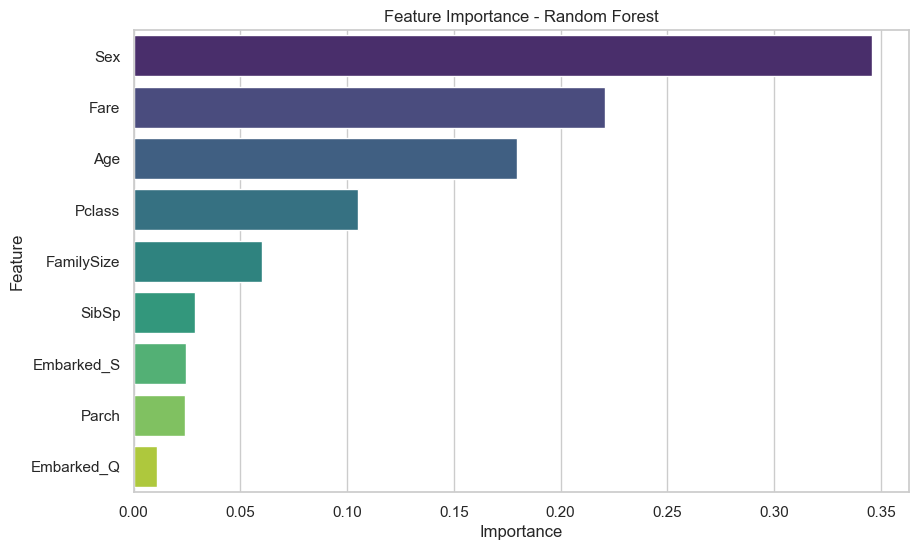

In [68]:
# Extract feature importances from the best Random Forest model
feature_importances = best_model_rf.feature_importances_
features = X.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
